In [40]:
import pandas as pd
import numpy as np
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
# Import the own modules
import sys
import json

# Importing the required libraries
import pandas as pd
pd.set_option('display.max_columns', 50) # Display up to 50 columns at a time
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import cm
plt.style.use('seaborn')
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12,5
import glob # To read all csv files in the directory
import seaborn as sns
import calendar
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, f1_score, precision_recall_fscore_support
import itertools
import time
#import xgboost as xgb

In [4]:
# Set the base name of the csv files
csv_name = 'Kickstarter0'
df = pd.DataFrame()
# Iterate through the numbers 0 to 55
for num in range(0,56):
    # Convert number to a string
    num = str(num)
    # If single digit number, add a 0 to the front
    if len(num) == 1:
        num = '0' + num
    # Load the current csv
    curr_df = pd.read_csv(str('./data/' + csv_name + num + '.csv'))
    # Merge all csv data to one data frame.
    df = pd.concat([df, curr_df], axis=0)

In [5]:

df

,backers_count,blurb,category,converted_pledged_amount,country,created_at,creator,currency,currency_symbol,currency_trailing_code,...,slug,source_url,spotlight,staff_pick,state,state_changed_at,static_usd_rate,urls,usd_pledged,usd_type
0,21,2006 was almost 7 years ago.... Can you believ...,"{""id"":43,""name"":""Rock"",""slug"":""music/rock"",""po...",802,US,1387659690,"{""id"":1495925645,""name"":""Daniel"",""is_registere...",USD,$,True,...,new-final-round-album,https://www.kickstarter.com/discover/categorie...,True,False,successful,1391899046,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",802.000000,international
1,97,An adorable fantasy enamel pin series of princ...,"{""id"":54,""name"":""Mixed Media"",""slug"":""art/mixe...",2259,US,1549659768,"{""id"":1175589980,""name"":""Katherine"",""slug"":""fr...",USD,$,True,...,princess-pals-enamel-pin-series,https://www.kickstarter.com/discover/categorie...,True,False,successful,1551801611,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",2259.000000,international
2,88,Helping a community come together to set the s...,"{""id"":280,""name"":""Photobooks"",""slug"":""photogra...",29638,US,1477242384,"{""id"":1196856269,""name"":""MelissaThomas"",""is_re...",USD,$,True,...,their-life-through-their-lens-the-amish-and-me...,https://www.kickstarter.com/discover/categorie...,True,True,successful,1480607932,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",29638.000000,international
3,193,Every revolution starts from the bottom and we...,"{""id"":266,""name"":""Footwear"",""slug"":""fashion/fo...",49158,IT,1540369920,"{""id"":1569700626,""name"":""WAO"",""slug"":""wearewao...",EUR,€,False,...,wao-the-eco-effect-shoes,https://www.kickstarter.com/discover/categorie...,True,False,successful,1544309940,1.136525,"{""web"":{""project"":""https://www.kickstarter.com...",49075.152520,international
4,20,Learn to build 10+ Applications in this comple...,"{""id"":51,""name"":""Software"",""slug"":""technology/...",549,US,1425706517,"{""id"":1870845385,""name"":""Kalpit Jain"",""is_regi...",USD,$,True,...,apple-watch-development-course,https://www.kickstarter.com/discover/categorie...,False,False,failed,1428511019,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",549.000000,domestic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
960,57,Steam Hollow is a Veteran owned Craft Brewery ...,"{""id"":307,""name"":""Drinks"",""slug"":""food/drinks""...",10320,US,1487697908,"{""id"":86849824,""name"":""Blane White"",""slug"":""st...",USD,$,True,...,steam-hollow-brewing-co,https://www.kickstarter.com/discover/categorie...,True,False,successful,1492171945,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",10320.000000,international
961,11,Over 250 healthy recipes free from ANY added S...,"{""id"":306,""name"":""Cookbooks"",""slug"":""food/cook...",305,AU,1450753265,"{""id"":1899017630,""name"":""Alan Wichert"",""is_reg...",AUD,$,True,...,fusion-detox-chef-alan-wichert-creates-the-health,https://www.kickstarter.com/discover/categorie...,False,False,failed,1453713310,0.727575,"{""web"":{""project"":""https://www.kickstarter.com...",316.495068,domestic
962,0,"Give your baby style and flair with ""Gorgeous ...","{""id"":264,""name"":""Childrenswear"",""slug"":""fashi...",0,US,1470991682,"{""id"":1589905505,""name"":""T. Simms"",""slug"":""1pr...",USD,$,True,...,gorgeous-princess-cheetah-collection,https://www.kickstarter.com/discover/categorie...,False,False,failed,1474837755,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",0.000000,international
963,11,"""The Lion & the Lyceum"" is a children's book a...","{""id"":46,""name"":""Children's Books"",""slug"":""pub...",1400,US,1424101898,"{""id"":1468696154,""name"":""Alex Beene"",""is_regis...",USD,$,True,...,the-lion-and-the-lyceum-childrens-book-based-o...,https://www.kickstarter.com/discover/categorie...,True,False,successful,1

In [6]:
df.drop(['source_url', 'urls', 'static_usd_rate', 'currency_trailing_code', 'friends', 'photo', 'currency_symbol', 'blurb'], axis = 1)



,backers_count,blurb,category,converted_pledged_amount,country,created_at,creator,currency,current_currency,deadline,...,permissions,pledged,profile,slug,spotlight,staff_pick,state,state_changed_at,usd_pledged,usd_type
0,21,2006 was almost 7 years ago.... Can you believ...,"{""id"":43,""name"":""Rock"",""slug"":""music/rock"",""po...",802,US,1387659690,"{""id"":1495925645,""name"":""Daniel"",""is_registere...",USD,USD,1391899046,...,NaN,802.0,"{""id"":822687,""project_id"":822687,""state"":""inac...",new-final-round-album,True,False,successful,1391899046,802.000000,international
1,97,An adorable fantasy enamel pin series of princ...,"{""id"":54,""name"":""Mixed Media"",""slug"":""art/mixe...",2259,US,1549659768,"{""id"":1175589980,""name"":""Katherine"",""slug"":""fr...",USD,USD,1551801611,...,NaN,2259.0,"{""id"":3665299,""project_id"":3665299,""state"":""in...",princess-pals-enamel-pin-series,True,False,successful,1551801611,2259.000000,international
2,88,Helping a community come together to set the s...,"{""id"":280,""name"":""Photobooks"",""slug"":""photogra...",29638,US,1477242384,"{""id"":1196856269,""name"":""MelissaThomas"",""is_re...",USD,USD,1480607930,...,NaN,29638.0,"{""id"":2730508,""project_id"":2730508,""state"":""in...",their-life-through-their-lens-the-amish-and-me...,True,True,successful,1480607932,29638.000000,international
3,193,Every revolution starts from the bottom and we...,"{""id"":266,""name"":""Footwear"",""slug"":""fashion/fo...",49158,IT,1540369920,"{""id"":1569700626,""name"":""WAO"",""slug"":""wearewao...",EUR,USD,1544309940,...,NaN,43180.0,"{""id"":3498742,""project_id"":3498742,""state"":""ac...",wao-the-eco-effect-shoes,True,False,successful,1544309940,49075.152520,international
4,20,Learn to build 10+ Applications in this comple...,"{""id"":51,""name"":""Software"",""slug"":""technology/...",549,US,1425706517,"{""id"":1870845385,""name"":""Kalpit Jain"",""is_regi...",USD,USD,1428511017,...,NaN,549.0,"{""id"":1754403,""project_id"":1754403,""state"":""in...",apple-watch-development-course,False,False,failed,1428511019,549.000000,domestic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
960,57,Steam Hollow is a Veteran owned Craft Brewery ...,"{""id"":307,""name"":""Drinks"",""slug"":""food/drinks""...",10320,US,1487697908,"{""id"":86849824,""name"":""Blane White"",""slug"":""st...",USD,USD,1492171945,...,NaN,10320.0,"{""id"":2888579,""project_id"":2888579,""state"":""ac...",steam-hollow-brewing-co,True,False,successful,1492171945,10320.000000,international
961,11,Over 250 healthy recipes free from ANY added S...,"{""id"":306,""name"":""Cookbooks"",""slug"":""food/cook...",305,AU,1450753265,"{""id"":1899017630,""name"":""Alan Wichert"",""is_reg...",AUD,USD,1453713309,...,NaN,435.0,"{""id"":2287910,""project_id"":2287910,""state"":""in...",fusion-detox-chef-alan-wichert-creates-the-health,False,False,failed,1453713310,316.495068,domestic
962,0,"Give your baby style and flair with ""Gorgeous ...","{""id"":264,""name"":""Childrenswear"",""slug"":""fashi...",0,US,1470991682,"{""id"":1589905505,""name"":""T. Simms"",""slug"":""1pr...",USD,USD,1474837753,...,NaN,0.0,"{""id"":2636287,""project_id"":2636287,""state"":""in...",gorgeous-princess-cheetah-collection,False,False,failed,1474837755,0.000000,international
963,11,"""The Lion & the Lyceum"" is a children's book a...","{""id"":46,""name"":""Children's Books"",""slug"":""pub...",1400,US,1424101898,"{""id"":1468696154,""name"":""Alex Beene"",""is_regis...",USD,USD,1426741200,...,NaN,1400.0,"{""id"":1709268,""project_id"":1709268,""state"":""in...",the-lion-and-the-lyceum-childrens-book-based-o...,True,False,successful,1426741214,1400.000000,domestic


In [7]:
df.shape

(209222, 37)

In [8]:
df['photo'].isnull().sum()


0

In [9]:
df['created_at'] = pd.to_datetime(df['created_at'],unit='s')

In [10]:
df['state_changed_at'] = pd.to_datetime(df['state_changed_at'],unit='s')

In [ ]:
df

,backers_count,blurb,category,converted_pledged_amount,country,created_at,creator,currency,currency_symbol,currency_trailing_code,...,slug,source_url,spotlight,staff_pick,state,state_changed_at,static_usd_rate,urls,usd_pledged,usd_type
0,21,2006 was almost 7 years ago.... Can you believ...,"{""id"":43,""name"":""Rock"",""slug"":""music/rock"",""po...",802,US,2013-12-21 21:01:30,"{""id"":1495925645,""name"":""Daniel"",""is_registere...",USD,$,True,...,new-final-round-album,https://www.kickstarter.com/discover/categorie...,True,False,successful,2014-02-08 22:37:26,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",802.000000,international
1,97,An adorable fantasy enamel pin series of princ...,"{""id"":54,""name"":""Mixed Media"",""slug"":""art/mixe...",2259,US,2019-02-08 21:02:48,"{""id"":1175589980,""name"":""Katherine"",""slug"":""fr...",USD,$,True,...,princess-pals-enamel-pin-series,https://www.kickstarter.com/discover/categorie...,True,False,successful,2019-03-05 16:00:11,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",2259.000000,international
2,88,Helping a community come together to set the s...,"{""id"":280,""name"":""Photobooks"",""slug"":""photogra...",29638,US,2016-10-23 17:06:24,"{""id"":1196856269,""name"":""MelissaThomas"",""is_re...",USD,$,True,...,their-life-through-their-lens-the-amish-and-me...,https://www.kickstarter.com/discover/categorie...,True,True,successful,2016-12-01 15:58:52,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",29638.000000,international
3,193,Every revolution starts from the bottom and we...,"{""id"":266,""name"":""Footwear"",""slug"":""fashion/fo...",49158,IT,2018-10-24 08:32:00,"{""id"":1569700626,""name"":""WAO"",""slug"":""wearewao...",EUR,€,False,...,wao-the-eco-effect-shoes,https://www.kickstarter.com/discover/categorie...,True,False,successful,2018-12-08 22:59:00,1.136525,"{""web"":{""project"":""https://www.kickstarter.com...",49075.152520,international
4,20,Learn to build 10+ Applications in this comple...,"{""id"":51,""name"":""Software"",""slug"":""technology/...",549,US,2015-03-07 05:35:17,"{""id"":1870845385,""name"":""Kalpit Jain"",""is_regi...",USD,$,True,...,apple-watch-development-course,https://www.kickstarter.com/discover/categorie...,False,False,failed,2015-04-08 16:36:59,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",549.000000,domestic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
960,57,Steam Hollow is a Veteran owned Craft Brewery ...,"{""id"":307,""name"":""Drinks"",""slug"":""food/drinks""...",10320,US,2017-02-21 17:25:08,"{""id"":86849824,""name"":""Blane White"",""slug"":""st...",USD,$,True,...,steam-hollow-brewing-co,https://www.kickstarter.com/discover/categorie...,True,False,successful,2017-04-14 12:12:25,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",10320.000000,international
961,11,Over 250 healthy recipes free from ANY added S...,"{""id"":306,""name"":""Cookbooks"",""slug"":""food/cook...",305,AU,2015-12-22 03:01:05,"{""id"":1899017630,""name"":""Alan Wichert"",""is_reg...",AUD,$,True,...,fusion-detox-chef-alan-wichert-creates-the-health,https://www.kickstarter.com/discover/categorie...,False,False,failed,2016-01-25 09:15:10,0.727575,"{""web"":{""project"":""https://www.kickstarter.com...",316.495068,domestic
962,0,"Give your baby style and flair with ""Gorgeous ...","{""id"":264,""name"":""Childrenswear"",""slug"":""fashi...",0,US,2016-08-12 08:48:02,"{""id"":1589905505,""name"":""T. Simms"",""slug"":""1pr...",USD,$,True,...,gorgeous-princess-cheetah-collection,https://www.kickstarter.com/discover/categorie...,False,False,failed,2016-09-25 21:09:15,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",0.000000,international
963,11,"""The Lion & the Lyceum"" is a children's book a...","{""id"":46,""name"":""Children's Books"",""slug"":""pub...",1400,US,2015-02-16 15:51:38,"{""id"":1468696154,""name"":""Alex Beene"",

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 209222 entries, 0 to 964
Data columns (total 37 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   backers_count             209222 non-null  int64         
 1   blurb                     209214 non-null  object        
 2   category                  209222 non-null  object        
 3   converted_pledged_amount  209222 non-null  int64         
 4   country                   209222 non-null  object        
 5   created_at                209222 non-null  datetime64[ns]
 6   creator                   209222 non-null  object        
 7   currency                  209222 non-null  object        
 8   currency_symbol           209222 non-null  object        
 9   currency_trailing_code    209222 non-null  bool          
 10  current_currency          209222 non-null  object        
 11  deadline                  209222 non-null  int64         
 12  disab

In [ ]:
print(df.iloc[0,1])

2006 was almost 7 years ago.... Can you believe how fast time has flown by? But after all this time... the new album is finally ready.


In [ ]:
#Checking for duplicates of individual projects
print(f"Of the {len(df)} projects in the dataset, there are {len(df[df.duplicated(subset='id')])} which are listed more than once.")

Of the 209222 projects in the dataset, there are 26958 which are listed more than once.


In [ ]:
# Converting dates from unix to datetime
cols_to_convert = ['created_at', 'deadline', 'launched_at']
for c in cols_to_convert:
    df[c] = pd.to_datetime(df[c], origin='unix', unit='s')

In [ ]:
print(f"The dataset contains projects added to Kickstarter between {min(df.created_at).strftime('%d %B %Y')} and {max(df.created_at).strftime('%d %B %Y')}.")


The dataset contains projects added to Kickstarter between 22 April 2009 and 14 March 2019.


In [ ]:
# Count length of each blurb
df['blurb_length'] = df1['blurb'].str.split().str.len()

# Drop blurb variable
df.drop('blurb', axis=1, inplace=True)

In [ ]:
df

,backers_count,blurb,category,converted_pledged_amount,country,created_at,creator,currency,currency_symbol,currency_trailing_code,...,slug,source_url,spotlight,staff_pick,state,state_changed_at,static_usd_rate,urls,usd_pledged,usd_type
0,21,2006 was almost 7 years ago.... Can you believ...,"{""id"":43,""name"":""Rock"",""slug"":""music/rock"",""po...",802,US,2013-12-21 21:01:30,"{""id"":1495925645,""name"":""Daniel"",""is_registere...",USD,$,True,...,new-final-round-album,https://www.kickstarter.com/discover/categorie...,True,False,successful,2014-02-08 22:37:26,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",802.000000,international
1,97,An adorable fantasy enamel pin series of princ...,"{""id"":54,""name"":""Mixed Media"",""slug"":""art/mixe...",2259,US,2019-02-08 21:02:48,"{""id"":1175589980,""name"":""Katherine"",""slug"":""fr...",USD,$,True,...,princess-pals-enamel-pin-series,https://www.kickstarter.com/discover/categorie...,True,False,successful,2019-03-05 16:00:11,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",2259.000000,international
2,88,Helping a community come together to set the s...,"{""id"":280,""name"":""Photobooks"",""slug"":""photogra...",29638,US,2016-10-23 17:06:24,"{""id"":1196856269,""name"":""MelissaThomas"",""is_re...",USD,$,True,...,their-life-through-their-lens-the-amish-and-me...,https://www.kickstarter.com/discover/categorie...,True,True,successful,2016-12-01 15:58:52,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",29638.000000,international
3,193,Every revolution starts from the bottom and we...,"{""id"":266,""name"":""Footwear"",""slug"":""fashion/fo...",49158,IT,2018-10-24 08:32:00,"{""id"":1569700626,""name"":""WAO"",""slug"":""wearewao...",EUR,€,False,...,wao-the-eco-effect-shoes,https://www.kickstarter.com/discover/categorie...,True,False,successful,2018-12-08 22:59:00,1.136525,"{""web"":{""project"":""https://www.kickstarter.com...",49075.152520,international
4,20,Learn to build 10+ Applications in this comple...,"{""id"":51,""name"":""Software"",""slug"":""technology/...",549,US,2015-03-07 05:35:17,"{""id"":1870845385,""name"":""Kalpit Jain"",""is_regi...",USD,$,True,...,apple-watch-development-course,https://www.kickstarter.com/discover/categorie...,False,False,failed,2015-04-08 16:36:59,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",549.000000,domestic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
960,57,Steam Hollow is a Veteran owned Craft Brewery ...,"{""id"":307,""name"":""Drinks"",""slug"":""food/drinks""...",10320,US,2017-02-21 17:25:08,"{""id"":86849824,""name"":""Blane White"",""slug"":""st...",USD,$,True,...,steam-hollow-brewing-co,https://www.kickstarter.com/discover/categorie...,True,False,successful,2017-04-14 12:12:25,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",10320.000000,international
961,11,Over 250 healthy recipes free from ANY added S...,"{""id"":306,""name"":""Cookbooks"",""slug"":""food/cook...",305,AU,2015-12-22 03:01:05,"{""id"":1899017630,""name"":""Alan Wichert"",""is_reg...",AUD,$,True,...,fusion-detox-chef-alan-wichert-creates-the-health,https://www.kickstarter.com/discover/categorie...,False,False,failed,2016-01-25 09:15:10,0.727575,"{""web"":{""project"":""https://www.kickstarter.com...",316.495068,domestic
962,0,"Give your baby style and flair with ""Gorgeous ...","{""id"":264,""name"":""Childrenswear"",""slug"":""fashi...",0,US,2016-08-12 08:48:02,"{""id"":1589905505,""name"":""T. Simms"",""slug"":""1pr...",USD,$,True,...,gorgeous-princess-cheetah-collection,https://www.kickstarter.com/discover/categorie...,False,False,failed,2016-09-25 21:09:15,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",0.000000,international
963,11,"""The Lion & the Lyceum"" is a children's book a...","{""id"":46,""name"":""Children's Books"",""slug"":""pub...",1400,US,2015-02-16 15:51:38,"{""id"":1468696154,""name"":""Alex Beene"",

In [15]:
#How to convert the relevant entries from the category column into new columns
test_creator = (df.iloc[1,6])
print(test_creator)

test_dict = json.loads(test_creator)
print(test_dict)

creator = test_dict['slug'].split('/')[0]
print(creator)

subcategory = test_dict['name']
print(subcategory)

{"id":1175589980,"name":"Katherine","slug":"freckleddisney","is_registered":null,"chosen_currency":null,"avatar":{"thumb":"https://ksr-ugc.imgix.net/assets/023/302/489/481158030bfc13d249a8c7c3426f92e6_original.jpg?ixlib=rb-1.1.0&w=40&h=40&fit=crop&v=1542510089&auto=format&frame=1&q=92&s=c8fa4b7eeb45d5502711c5398071690a","small":"https://ksr-ugc.imgix.net/assets/023/302/489/481158030bfc13d249a8c7c3426f92e6_original.jpg?ixlib=rb-1.1.0&w=160&h=160&fit=crop&v=1542510089&auto=format&frame=1&q=92&s=9e096abc34cccb1d7185d9263dd8612d","medium":"https://ksr-ugc.imgix.net/assets/023/302/489/481158030bfc13d249a8c7c3426f92e6_original.jpg?ixlib=rb-1.1.0&w=160&h=160&fit=crop&v=1542510089&auto=format&frame=1&q=92&s=9e096abc34cccb1d7185d9263dd8612d"},"urls":{"web":{"user":"https://www.kickstarter.com/profile/freckleddisney"},"api":{"user":"https://api.kickstarter.com/v1/users/1175589980?signature=1552621994.37e7b84b86bf84f119dcda2a5d2d469bd7e5eb35"}}}
{'id': 1175589980, 'name': 'Katherine', 'slug': 'fr

In [3]:
#Turns all the entries in the category from strings to dicts
df.creator = df.creator.apply(lambda x: json.loads(x))

NameError: name 'df' is not defined

In [17]:
print(df.profile[0])


0    {"id":822687,"project_id":822687,"state":"inac...
0    {"id":3272613,"project_id":3272613,"state":"in...
0    {"id":265832,"project_id":265832,"state":"inac...
0    {"id":2937040,"project_id":2937040,"state":"in...
0    {"id":2329114,"project_id":2329114,"state":"in...
0    {"id":3068939,"project_id":3068939,"state":"in...
0    {"id":3372740,"project_id":3372740,"state":"ac...
0    {"id":663642,"project_id":663642,"state":"acti...
0    {"id":3540074,"project_id":3540074,"state":"in...
0    {"id":2270021,"project_id":2270021,"state":"in...
0    {"id":1518967,"project_id":1518967,"state":"in...
0    {"id":408431,"project_id":408431,"state":"inac...
0    {"id":16630,"project_id":16630,"state":"active...
0    {"id":937216,"project_id":937216,"state":"inac...
0    {"id":1259832,"project_id":1259832,"state":"in...
0    {"id":32097,"project_id":32097,"state":"inacti...
0    {"id":3663014,"project_id":3663014,"state":"in...
0    {"id":1311168,"project_id":1311168,"state":"in...
0    {"id"

In [20]:
df.rename(columns={'currency':'original_currency'}, inplace=True)
df.drop([
    'blurb', 
    'converted_pledged_amount',
    'currency_symbol', 
    'currency_trailing_code', 
    'friends', 
    'fx_rate', 
    'is_backing',
    'permissions',
    'photo',
    'profile',
    'slug',
    'source_url', 
    'static_usd_rate',
    'urls'
    ], axis=1, inplace=True)

In [22]:
df.location

0      {"id":2379574,"name":"Chicago","slug":"chicago...
1      {"id":2486340,"name":"Sacramento","slug":"sacr...
2      {"id":2383660,"name":"Columbus","slug":"columb...
3      {"id":725746,"name":"Venice","slug":"venice-ve...
4      {"id":2479651,"name":"Redmond","slug":"redmond...
                             ...                        
960    {"id":2445043,"name":"Manteno","slug":"manteno...
961    {"id":1105779,"name":"Sydney","slug":"sydney-a...
962    {"id":2393370,"name":"Dover","slug":"dover-de"...
963    {"id":2457170,"name":"Nashville","slug":"nashv...
964    {"id":44418,"name":"London","slug":"london-gb"...
Name: location, Length: 209222, dtype: object

In [27]:
df

,backers_count,category,country,created_at,creator,original_currency,current_currency,deadline,disable_communication,goal,...,launched_at,location,name,pledged,spotlight,staff_pick,state,state_changed_at,usd_pledged,usd_type
0,21,"{""id"":43,""name"":""Rock"",""slug"":""music/rock"",""po...",US,2013-12-21 21:01:30,"{""id"":1495925645,""name"":""Daniel"",""is_registere...",USD,USD,1391899046,False,200.0,...,1388011046,"{""id"":2379574,""name"":""Chicago"",""slug"":""chicago...",New Final Round Album,802.0,True,False,successful,2014-02-08 22:37:26,802.000000,international
1,97,"{""id"":54,""name"":""Mixed Media"",""slug"":""art/mixe...",US,2019-02-08 21:02:48,"{""id"":1175589980,""name"":""Katherine"",""slug"":""fr...",USD,USD,1551801611,False,400.0,...,1550073611,"{""id"":2486340,""name"":""Sacramento"",""slug"":""sacr...",Princess Pals Enamel Pin Series,2259.0,True,False,successful,2019-03-05 16:00:11,2259.000000,international
2,88,"{""id"":280,""name"":""Photobooks"",""slug"":""photogra...",US,2016-10-23 17:06:24,"{""id"":1196856269,""name"":""MelissaThomas"",""is_re...",USD,USD,1480607930,False,27224.0,...,1478012330,"{""id"":2383660,""name"":""Columbus"",""slug"":""columb...",Their Life Through Their Lens-the Amish and Me...,29638.0,True,True,successful,2016-12-01 15:58:52,29638.000000,international
3,193,"{""id"":266,""name"":""Footwear"",""slug"":""fashion/fo...",IT,2018-10-24 08:32:00,"{""id"":1569700626,""name"":""WAO"",""slug"":""wearewao...",EUR,USD,1544309940,False,40000.0,...,1540684582,"{""id"":725746,""name"":""Venice"",""slug"":""venice-ve...",WAO: THE ECO EFFECT SHOES,43180.0,True,False,successful,2018-12-08 22:59:00,49075.152520,international
4,20,"{""id"":51,""name"":""Software"",""slug"":""technology/...",US,2015-03-07 05:35:17,"{""id"":1870845385,""name"":""Kalpit Jain"",""is_regi...",USD,USD,1428511017,False,1000.0,...,1425919017,"{""id"":2479651,""name"":""Redmond"",""slug"":""redmond...",Apple Watch Development Course,549.0,False,False,failed,2015-04-08 16:36:59,549.000000,domestic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
960,57,"{""id"":307,""name"":""Drinks"",""slug"":""food/drinks""...",US,2017-02-21 17:25:08,"{""id"":86849824,""name"":""Blane White"",""slug"":""st...",USD,USD,1492171945,False,10000.0,...,1488287545,"{""id"":2445043,""name"":""Manteno"",""slug"":""manteno...",Steam Hollow Brewery and Taproom,10320.0,True,False,successful,2017-04-14 12:12:25,10320.000000,international
961,11,"{""id"":306,""name"":""Cookbooks"",""slug"":""food/cook...",AU,2015-12-22 03:01:05,"{""id"":1899017630,""name"":""Alan Wichert"",""is_reg...",AUD,USD,1453713309,False,8000.0,...,1451121309,"{""id"":1105779,""name"":""Sydney"",""slug"":""sydney-a...",Fusion Detox - Chef Alan Wichert creates THE h...,435.0,False,False,failed,2016-01-25 09:15:10,316.495068,domestic
962,0,"{""id"":264,""name"":""Childrenswear"",""slug"":""fashi...",US,2016-08-12 08:48:02,"{""id"":1589905505,""name"":""T. Simms"",""slug"":""1pr...",USD,USD,1474837753,False,8000.0,...,1472245753,"{""id"":2393370,""name"":""Dover"",""slug"":""dover-de""...",Gorgeous Princess Cheetah Collection,0.0,False,False,failed,2016-09-25 21:09:15,0.000000,international
963,11,"{""id"":46,""name"":""Children's Books"",""slug"":""pub...",US,2015-02-16 15:51:38,"{""id"":1468696154,""name"":""Alex Beene"",""is_regis...",USD,USD,1426741200,False,1000.0,...,1424188645,"{""id"":2457170,""name"":""Nashville"",""slug"":""nashv...","""The Lion & The Lyceum"" Children's Book - Base...",1400.0,True,False,successful,2015-03-19 05:00:14,1400.000000,domestic


In [25]:
import seaborn as sns
# import the necessary libraries you need for your analysis
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, date, time, timedelta

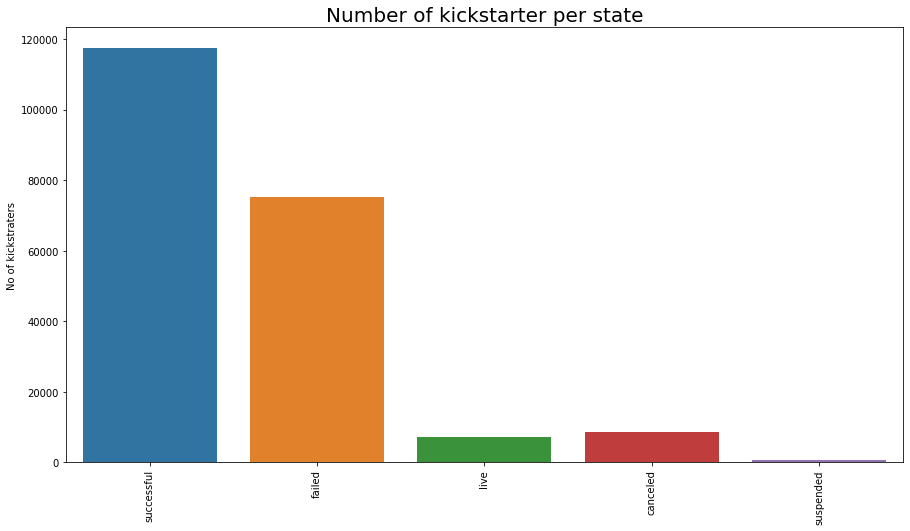

In [29]:
# Plot number of videos per category
plt.figure(figsize=(15,8)) # specify figure size
f1 = sns.countplot(x=df['state']) # create countplot
f1.tick_params(axis='x', rotation=90) # get x-ticks and rotate them
f1.set(xlabel=None) # set no label for x-axis 
f1.set_ylabel("No of kickstraters", fontsize = 10); # set label for y-axis
f1.set_title('Number of kickstarter per state', fontsize=20); # set title

Live state eventuell droppen

In [32]:
df.goal.describe()

count    2.092220e+05
mean     4.917604e+04
std      1.179427e+06
min      1.000000e-02
25%      1.500000e+03
50%      5.000000e+03
75%      1.500000e+04
max      1.000000e+08
Name: goal, dtype: float64

<AxesSubplot:>

Text(0.5, 1.0, 'Number of projects')

Text(0.5, 0, '')

<AxesSubplot:xlabel='state'>

Text(0.5, 1.0, 'Median project goal ($)')

Text(0.5, 0, '')

<AxesSubplot:xlabel='state'>

Text(0.5, 1.0, 'Median pledged per project ($)')

Text(0.5, 0, '')

<AxesSubplot:xlabel='state'>

Text(0.5, 1.0, 'Median backers per project')

Text(0.5, 0, '')

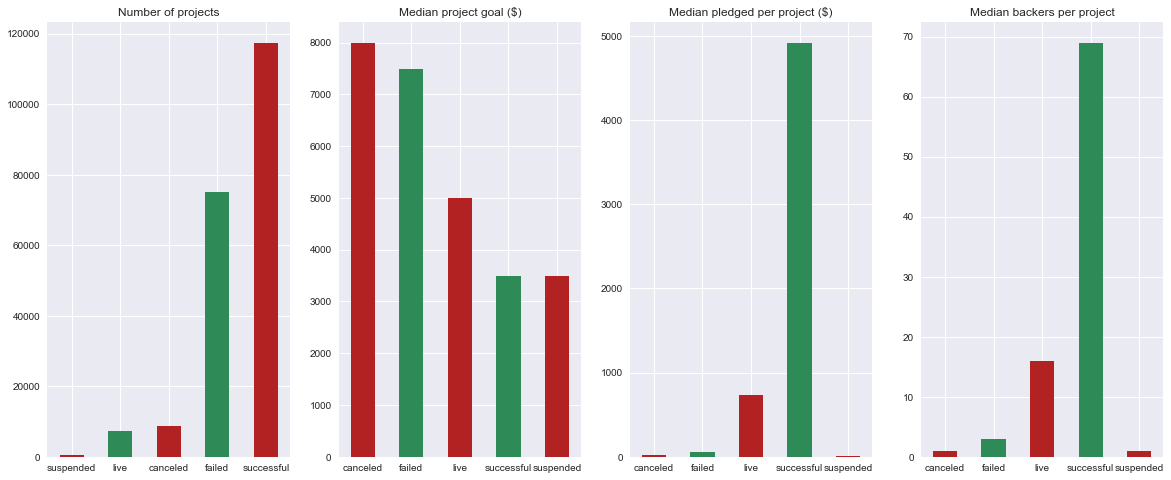

In [56]:
fig, ((ax1, ax2, ax3, ax4)) = plt.subplots(1, 4, figsize=(20,8))

df['state'].value_counts(ascending=True).plot(kind='bar', ax=ax1, color=['firebrick', 'seagreen'], rot=0)
ax1.set_title('Number of projects')
ax1.set_xlabel('')

df.groupby('state').goal.median().plot(kind='bar', ax=ax2, color=['firebrick', 'seagreen'], rot=0)
ax2.set_title('Median project goal ($)')
ax2.set_xlabel('')

df.groupby('state').usd_pledged.median().plot(kind='bar', ax=ax3, color=['firebrick', 'seagreen'], rot=0)
ax3.set_title('Median pledged per project ($)')
ax3.set_xlabel('')

df.groupby('state').backers_count.median().plot(kind='bar', ax=ax4, color=['firebrick', 'seagreen'], rot=0)
ax4.set_title('Median backers per project')
ax4.set_xlabel('')


fig.subplots_adjust(hspace=0.3)
plt.show()